In [1]:
import numpy as np
import matplotlib.pyplot as plt
import fitsio

In [2]:
rng = np.random.default_rng(1009921)

In [3]:
dl = 1e-4

# Full range to fit for qsos from z=0 to z=4
# that overlap the simulated grid
# somewhat Magic numbers taken from data generation used
# to generate these templates
l_min, l_max = (2.857407737927015, 3.999887238301401)
nbins = int((l_max - l_min) / dl)
w_grid = l_min + np.arange(nbins) * dl

# Making the grid a nice even number of pixels
nbins_final = 11400
trunc = (nbins - nbins_final) // 2
w_grid = w_grid[trunc:-trunc]
if len(w_grid) == 11401: w_grid = w_grid[:-1]
l_min = np.log10(w_grid[0])
l_max = np.log10(w_grid[-1])


In [4]:
H_nearly = np.load("templates/H_nearly_no_lya.npy")
W_nearly = np.load("templates/W_nearly_no_lya.npy")

H_nearly_no = np.load("templates/H_nearly_no_lya_noiseless.npy")
W_nearly_no = np.load("templates/W_nearly_no_lya_noiseless.npy")

In [5]:
H_shift = np.load("templates/H_shift_no_lya.npy")
W_shift = np.load("templates/W_shift_no_lya.npy")

H_shift_no = np.load("templates/H_shift_no_lya_noiseless.npy")
W_shift_no = np.load("templates/W_shift_no_lya_noiseless.npy")

In [6]:
plt.rcParams.update({'font.size': 18})
def plot_all_templates(W, name, W_2=None, H=None, H_2 = None, relative=False, savefig=False, rescale=True, on_grid=True):
    n_templates = W.shape[-1]
    fig, ax = plt.subplots(n_templates, 1, figsize=(14, 12), layout="constrained")

    # On grid is whether or not we should plot it on the logarithmic grid or not
    alpha = 1
    x_grid = 10**(w_grid) if on_grid else np.arange(len(W[:, 0]))
    for i in range(n_templates):
        if rescale:
            # There are some edge effects, which is why 
            # we take the max from 10 onwards.
            div = np.max(W[10:, :]) if relative else np.max(W[10:, :], axis=0)[i]
            ax[i].plot(x_grid, W[:, i] / div, ".", c="dimgray", ms=0.7, label="Noisy Data Templates")

            if W_2 is not None:
                ax[i].plot(x_grid, W_2[:, i] / div, alpha=0.7, c="r", lw=1, label="Noise-Free Data Templates")
            ax[i].set(ylim=[0, 1.1])
        else:
            ax[i].plot(x_grid, W[:, i], ".", c="dimgray", ms=0.7)
            if W_2 is not None:
                ax[i].plot(x_grid, W_2[:, i], alpha=0.7, c="r", lw=1)

        ax[i].get_yaxis().set_ticks([])
        ax[i].set(xlim=([x_grid[0], x_grid[-1]]), xscale="log")
        if i != 4: ax[i].get_xaxis().set_ticks([])
        
    style = "relative" if relative else "individual"
    ax[0].set_title(f"{name}")
    ax[0].legend()
    
    if on_grid:
        x_labels = np.asarray([100, 200, 500, 1000])
        ax[-1].set_xticks(x_labels*10, x_labels)
    else:
        xt = np.arange(x_grid[0], x_grid[-1], 1000)
        ax[-1].set(xticks=xt, xticklabels=(np.round(10**(w_grid)[xt])).astype(int), xlabel="Wavelength (A)")

    plt.xlabel("Wavelength ($nm$)")
    name_for_save = name.replace(" ", "_")
    if savefig: plt.savefig(f"plots/simqso_{name_for_save}_templates.pdf", bbox_inches="tight")

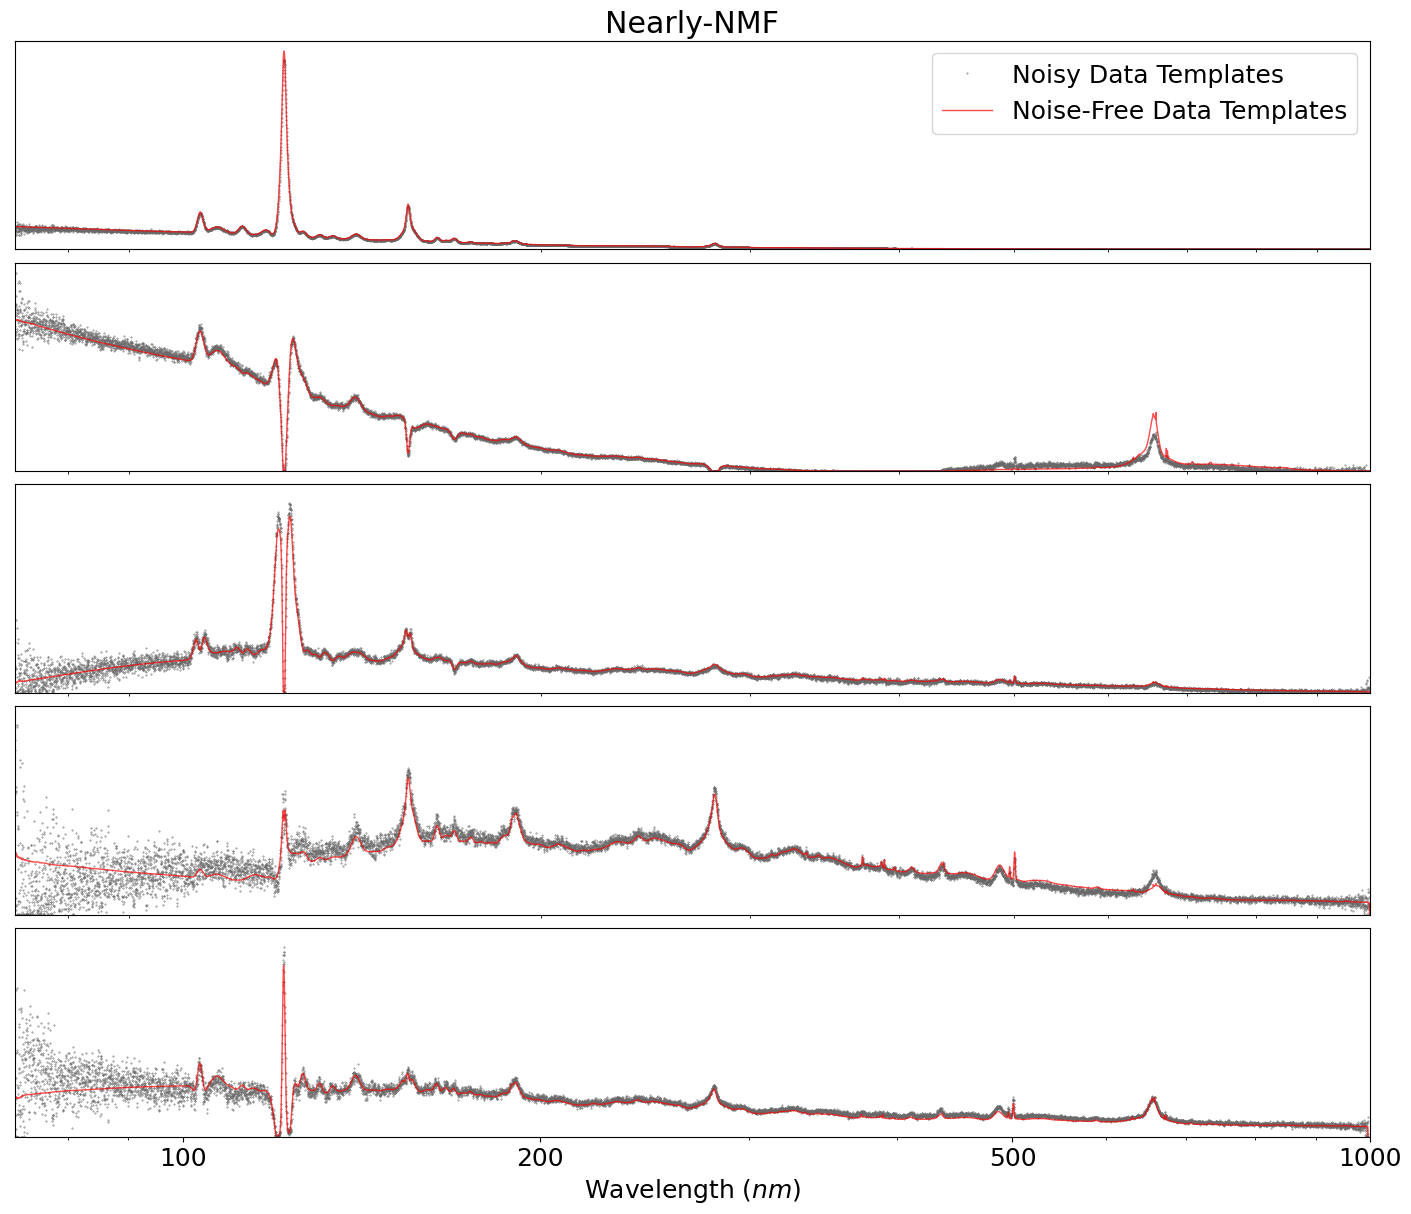

In [7]:
plot_all_templates(W_nearly, "Nearly-NMF", W_nearly_no, H_nearly, H_nearly_no, rescale=True, relative=False, on_grid=True, savefig=True)

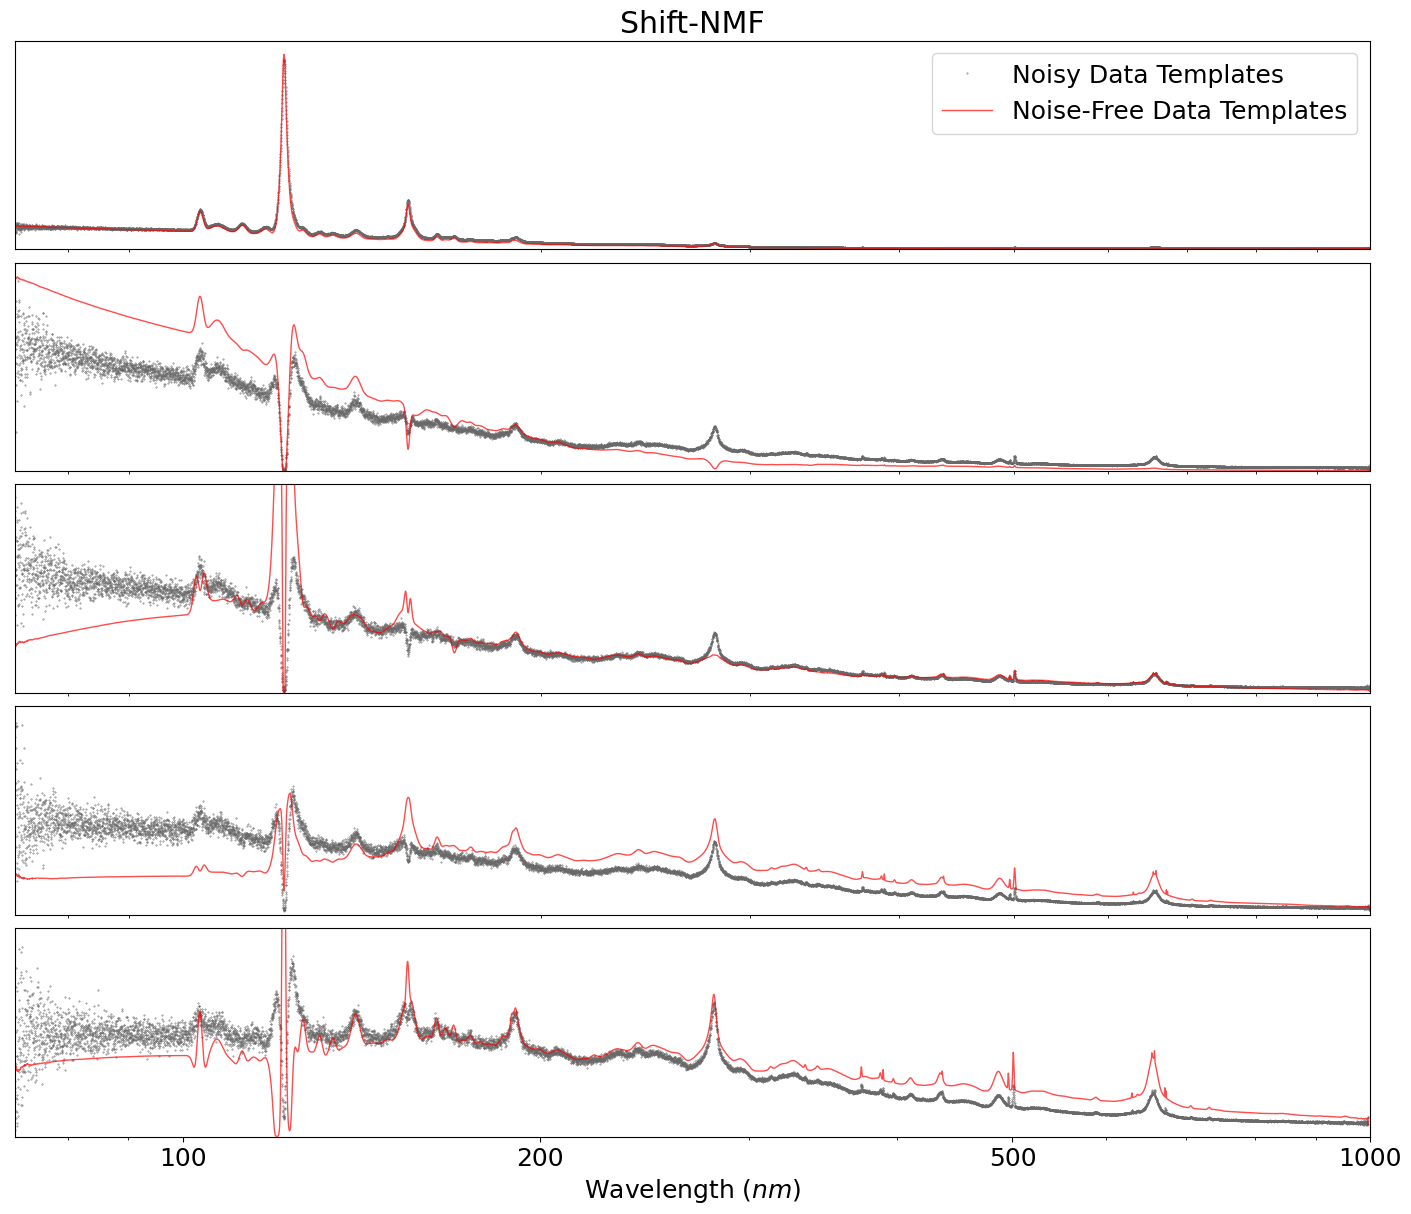

In [8]:
plot_all_templates(W_shift, "Shift-NMF", W_shift_no, H_shift, H_shift_no, rescale=True, relative=False, on_grid=True, savefig=True)